In [4]:
import numpy as np
import pandas as pd
import os


df = pd.read_csv("../data/clean_processed.csv")

In [20]:
df.shape

(6255, 12)

In [13]:
df.head()

,Year,Artist,Song Title,Rank,Lyrics,Nouns,Verbs,Adverbs,Corpus,Word Counts,Unique Word Counts,decade
0,1959,Johnny Horton,The Battle Of New Orleans,1,In 1814 we took a little trip Along with Colo...,trip bacon bean town gun comin while river of'...,take take take catch fire keep be be fire begi...,along as ago once more so as ago once more the...,take little trip colonel jackson mighty missis...,435,155,1950
1,1959,Bobby Darin,Mack The Knife,2,"Oh the shark, babe Has such teeth, dear And he...",shark babe tooth jackknife babe sight shark to...,have show have keep know bite billow spread be...,pearly just so never never now just just down ...,oh shark babe tooth dear show pearly white jac...,224,145,1950
2,1959,Lloyd Price,Personality,3,Over and over I tried to prove my love to you ...,love friend fool fool personality personality ...,try prove do say get get do cause get get do s...,over over over over over over so over now over...,try prove love friend say fool fool cause get ...,215,55,1950
3,1959,Frankie Avalon,Venus,4,"Hey, Venus! Oh, Venus! Venus, if you will Ple...",girl girl kiss arm girl charm girl sunlight ha...,send thrill want make take place ask promise g...,surely too always as long surely too always as...,hey venus oh venus venus send little girl thri...,166,74,1950
4,1959,Paul Anka,Lonely Boy,5,I'm just a lonely boy Lonely and blue I'm all ...,boy nothing moment love night day boy nothing ...,do get think want love love kiss hold like hea...,just all just all just so hard just all,lonely boy lonely blue get think want love yes...,140,68,1950


In [7]:
# Mean/Median Lyrics Length（Word Count）
lyrics_stats = df.groupby("Year").agg(
    mean_words=("Word Counts", "mean"),
    median_words=("Word Counts", "median")
)
lyrics_stats

,mean_words,median_words
Year,,
1959,195.344828,170.0
1960,183.010753,153.0
1961,206.146067,169.0
1962,194.032258,191.0
1963,193.702128,198.5
...,...,...
2019,445.316327,403.5
2020,452.765957,411.5
2021,434.936842,420.0


In [12]:
# Trends in Unique Word Counts
unique_stats = df.groupby("Year").agg(
    mean_unique=("Unique Word Counts", "mean"),
    mean_words=("Word Counts", "mean")
)

# lexical diversity
unique_stats["lexical_diversity"] = (
    unique_stats["mean_unique"] / unique_stats["mean_words"]
)

unique_stats = unique_stats.reset_index()
unique_stats


,Year,mean_unique,mean_words,lexical_diversity
0,1959,86.218391,195.344828,0.441365
1,1960,80.838710,183.010753,0.441716
2,1961,90.595506,206.146067,0.439472
3,1962,83.064516,194.032258,0.428096
4,1963,82.085106,193.702128,0.423770
...,...,...,...,...
60,2019,169.948980,445.316327,0.381637
61,2020,174.585106,452.765957,0.385597
62,2021,178.400000,434.936842,0.410174
63,2022,164.494737,407.136842,0.404028


In [9]:
# Average Nouns / Verbs / Adverbs per Song
pos_stats = df.groupby("Year").agg(
    mean_nouns=("Nouns", lambda x: x.str.split().str.len().mean()),
    mean_verbs=("Verbs", lambda x: x.str.split().str.len().mean()),
    mean_adverbs=("Adverbs", lambda x: x.str.split().str.len().mean())
)
pos_stats

,mean_nouns,mean_verbs,mean_adverbs
Year,,,
1959,29.218391,30.162791,12.797619
1960,28.956522,27.239130,10.300000
1961,32.306818,31.318182,13.091954
1962,29.731183,34.611111,12.089888
1963,31.021505,32.372340,13.582418
...,...,...,...
2019,70.123711,72.071429,21.581633
2020,72.351064,72.425532,24.531915
2021,71.284211,67.000000,24.410526


In [10]:
# Linguistic Complexity Over Decades
df["decade"] = (df["Year"] // 10) * 10

complexity_stats = df.groupby("decade").agg(
    lexical_diversity=("Unique Word Counts", lambda x: x.mean() / df.loc[x.index, "Word Counts"].mean()),
    pos_density=("Corpus", lambda x: x.str.split().str.len().mean())
)
complexity_stats

,lexical_diversity,pos_density
decade,,
1950,0.441365,89.954023
1960,0.431677,91.809979
1970,0.397311,110.025237
1980,0.382966,117.537207
1990,0.378240,160.111227
2000,0.362808,204.378601
2010,0.356884,201.211009
2020,0.401939,206.728232


In [14]:
# Merge tables on Year
stats_all = (
    lyrics_stats
    .merge(unique_stats, on="Year")
    .merge(pos_stats, on="Year")
)

stats_all.head()
stats_all = stats_all.rename(columns={"mean_words_x": "mean_words"})
stats_all = stats_all.drop(columns=["mean_words_y"])
stats_all

,Year,mean_words,median_words,mean_unique,lexical_diversity,mean_nouns,mean_verbs,mean_adverbs
0,1959,195.344828,170.0,86.218391,0.441365,29.218391,30.162791,12.797619
1,1960,183.010753,153.0,80.838710,0.441716,28.956522,27.239130,10.300000
2,1961,206.146067,169.0,90.595506,0.439472,32.306818,31.318182,13.091954
3,1962,194.032258,191.0,83.064516,0.428096,29.731183,34.611111,12.089888
4,1963,193.702128,198.5,82.085106,0.423770,31.021505,32.372340,13.582418
...,...,...,...,...,...,...,...,...
60,2019,445.316327,403.5,169.948980,0.381637,70.123711,72.071429,21.581633
61,2020,452.765957,411.5,174.585106,0.385597,72.351064,72.425532,24.531915
62,2021,434.936842,420.0,178.400000,0.410174,71.284211,67.000000,24.410526
63,2022,407.136842,391.0,164.494737,0.404028,65.926316,58.926316,20.547368


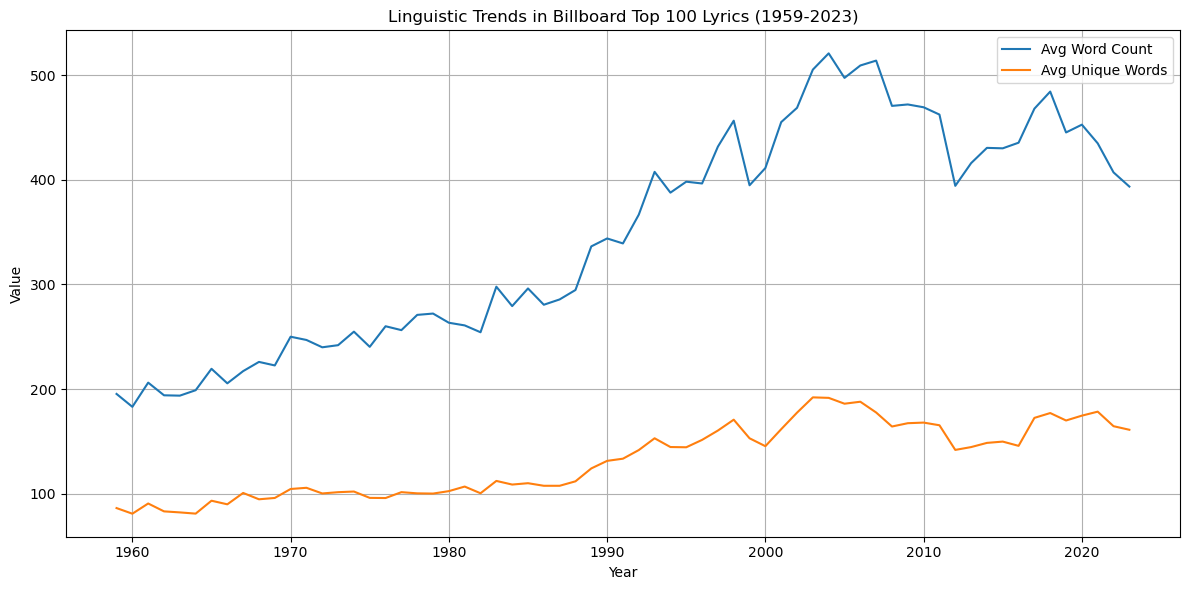

In [ ]:
# mean_words length
# mean_unique counts
# lexical_diversity
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(stats_all["Year"], stats_all["mean_words"], label="Avg Word Count")
plt.plot(stats_all["Year"], stats_all["mean_unique"], label="Avg Unique Words")


plt.legend()
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Linguistic Trends in Billboard Top 100 Lyrics (1959-2023)")
plt.grid(True)
plt.tight_layout()
plt.show()


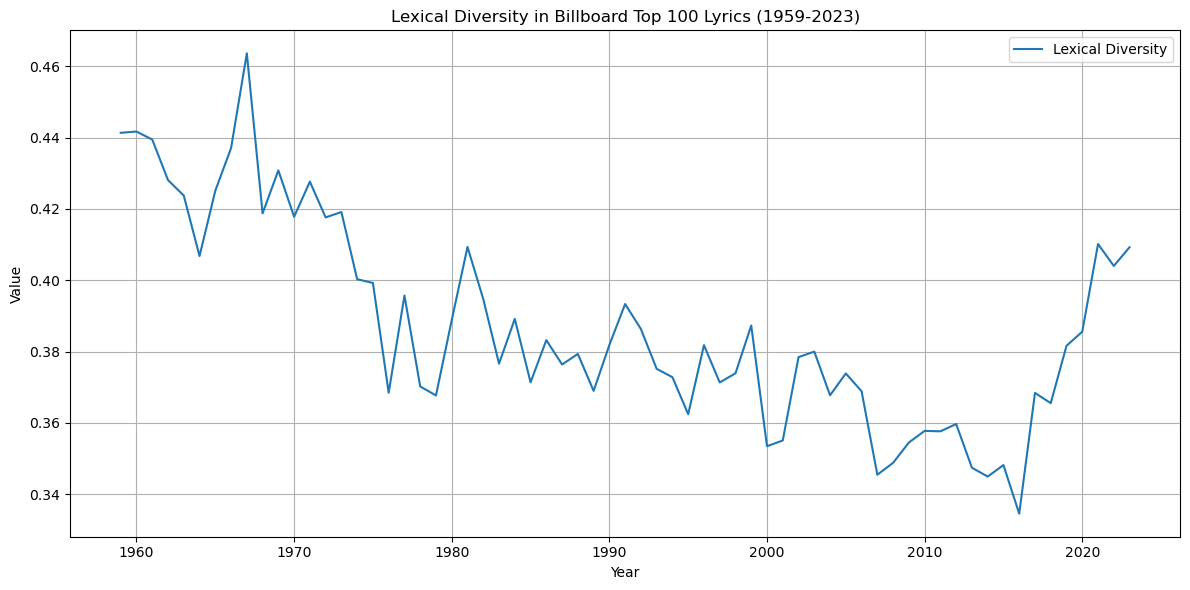

In [18]:
plt.figure(figsize=(12, 6))

plt.plot(stats_all["Year"], stats_all["lexical_diversity"], label="Lexical Diversity")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Lexical Diversity in Billboard Top 100 Lyrics (1959-2023)")
plt.grid(True)
plt.tight_layout()
plt.show()
